# Data Denoising
- G2P Error (12%)
- Label Error (3%)

## Import Libraries

In [2]:
import pandas as pd
import os
from g2pk import G2p
from tqdm import tqdm
from random import random
from sklearn.model_selection import train_test_split

## Load `train.csv` as Total Data

In [2]:
BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, '../data')

In [3]:
total_data = pd.read_csv(os.path.join(DATA_DIR, 'train_with_labels.csv'))
total_data.head(20)

,ID,text,label_text,target,url,date
0,ynat-v1_train_00000,유튜브 내달 2일까지 크리에이터 지원 공간 운영,생활문화,3,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.06.30. 오전 10:36
1,ynat-v1_train_00001,어버이날 막따가 흐려저…남부지방 여튼 황사,생활문화,3,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.05.08. 오전 5:25
2,ynat-v1_train_00002,내년부터 국가RD 평가 때 논문건수는 반영 않는다,사회,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.03.15. 오후 12:00
3,ynat-v1_train_00003,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,사회,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2017.02.28. 오전 9:54
4,ynat-v1_train_00004,회새긴간 작까 김동시 걍심꼬백 뜽 새 소설집 뚜권 출간,생활문화,3,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.04.03. 오전 7:05
5,ynat-v1_train_00005,야외서 생방송 하세요…액션캠 전용 요금제 잇따라,정치,0,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.07.18. 오전 9:46
6,ynat-v1_train_00006,월드컵 태극전사 16강 전초기지 레오강 입성종합,IT과학,5,https://sports.news.naver.com/news.nhn?oid=001...,2018.06.04 08:15
7,ynat-v1_train_00007,미세먼지 속 출근길,생활문화,3,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.01.17. 오전 10:14
8,ynat-v1_train_00008,왓츠앱稅 230원에 성난 레바논 민심…총리사퇴로 이어져종합2보,세계,4,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.10.30. 오전 4:17
9,ynat-v1_train_00009,베트남 경제 고성장 지속…2분기 GDP 6.71% 성장,세계,4,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.06.28. 오후 5:42


In [4]:
train_data, valid_data = train_test_split(total_data, test_size=0.3, random_state=456)
train_data

,ID,text,label_text,target,url,date
34661,ynat-v1_train_34661,홍콩 행정장관 유화 제스처…시위대 요구 일부 수용 시사종합,세계,4,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.10.21. 오후 10:49
26526,ynat-v1_train_26526,신간 한 문장·그대에게 연을 띄우며,생활문화,3,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.01.17. 오전 7:00
29642,ynat-v1_train_29642,MLB 강정호최지만 동반 무안타 침묵,IT과학,5,https://sports.news.naver.com/news.nhn?oid=001...,2019.03.20 06:35
20200,ynat-v1_train_20200,文대통령여야 대표 4개월만에 회동…꽉 막힌 정국 풀릴까,스포츠,6,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.11.08. 오후 12:45
13212,ynat-v1_train_13212,퇴임 앞둔 英총리 트럼프 만나 기후변화 문제제기할 것,세계,4,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.06.03. 오후 4:41
...,...,...,...,...,...,...
25500,ynat-v1_train_25500,적자 절반으로 줄인 LG폰…5G 중가폰 내고 ODM 확대종합,정치,0,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.10.30. 오후 5:10
10735,ynat-v1_train_10735,원내대책회의 참석하는 홍영표와 김태년,스포츠,6,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.12.04. 오전 9:56
27225,ynat-v1_train_27225,일 연구팀 피부에 직접 붙이는 디스플레이 개발,세계,4,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.02.19. 오전 9:42
613,ynat-v1_train_00613,조달청 한눈에 보는 우수 조달물품 안내책자 발간,생활문화,3,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.07.12. 오후 2:40


In [6]:
# train_data.to_csv(os.path.join(DATA_DIR, 'train_split_base.csv'), index=False)
# valid_data.to_csv(os.path.join(DATA_DIR, 'valid_split_base.csv'), index=False)

## G2P Error Denoising

- __G2P__: __Grapheme-to-phoneme__ 의 약자로, 원본 문장을 발음대로 적은 것

    - __Prescriptive pronunciation__: 언어 규범이나 표준에 따라 어떻게 발음해야 하는지를 정해놓은 방식으로, 특정 언어 규범이나 발음 규칙을 따라 발음을 교정하거나 가이드하는 목적으로 사용. 예를 들어, 어떤 단어나 음절을 특정한 방식으로 발음해야 한다는 규칙을 제시하는 것. 주로 언어 교육이나 발음 표준화에 사용.
    
    - __Descriptive pronunciation__: 실제로 사용되는 언어의 발음 현상을 관찰하고 기술하는 방식으로, 언어 사용자들이 어떻게 발음하는지를 기술하고 분석하며, 언어 사용자들 사이의 변이나 다양성을 인정. 기술적 발음은 특정한 규칙이나 규범을 따르는 것보다는 실제 언어 사용 현상을 이해하고 설명하는 데 중점. 언어학 연구나 음성 인식과 같은 분야에서 사용.

In [7]:
print(total_data.iloc[1].text)

어버이날 막따가 흐려저…남부지방 여튼 황사


- 한국어 G2P API 사용
    - URL: https://github.com/Kyubyong/g2pK

In [8]:
g2p = G2p()
sample_sent = "유은혜 부총리 일제 식민지 피해 실태와 과제 심포지엄 참석"
print(g2p(sample_sent, descriptive=False)) # prescriptive pronounciation
print(g2p(sample_sent, descriptive=True)) # descriptive pronounciation

유은혜 부총니 일제 싱민지 피해 실태와 과제 심포지엄 참석
유은헤 부총니 일제 싱민지 피해 실태와 과제 심포지엄 참석


- 만약 G2P된 문장을 다시 G2P로 변환한다면?
    - G2P error 데이터는 양방향 변환에서 변경이 없을 것
    - 물론 뉴스 기사 제목 텍스트는 길이가 길지 않아 예외 사항이 많을 것. 한 번 확인해 볼 필요 있음

In [ ]:
def find_g2p_suspicious(df):
    G2P_suspicious = pd.DataFrame()
    g2p = G2p()
    print("[Finding G2P Suspicious]")
    for idx, td in tqdm(total_data.iterrows(), total=len(total_data)):
        if g2p(td.text, descriptive=False) == td.text or g2p(td.text, descriptive=True) == td.text:
            td_df = pd.DataFrame(td).transpose()
            G2P_suspicious = pd.concat([G2P_suspicious, td_df], ignore_index=False)

    print("# of G2P Suspicious: {}".format(len(G2P_suspicious)))

    return G2P_suspicious

In [ ]:
# G2P_suspicious = find_g2p_suspicious(total_data)
# G2P_suspicious.to_csv(os.path.join(DATA_DIR, 'g2p_suspicious.csv'), index=True)

In [11]:
G2P_suspicious = pd.read_csv(os.path.join(DATA_DIR, 'g2p_suspicious.csv'), index_col=0)

['NanumGothic']


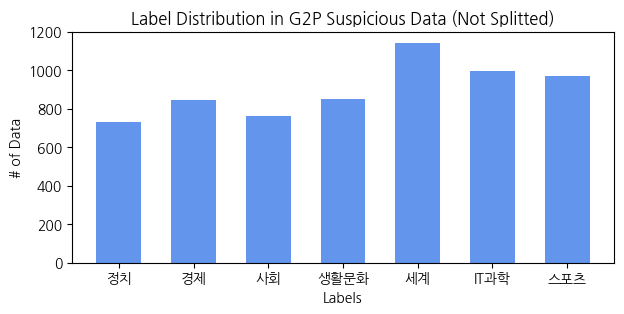

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

matplotlib.rcParams['font.family'] ='NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False
print(plt.rcParams['font.family'])

labels = ['정치', '경제', '사회', '생활문화', '세계', 'IT과학', '스포츠']
lab2num = {cat: idx for idx, cat in enumerate(labels)}
num2lab = {idx: cat for idx, cat in enumerate(labels)}

g2p_label_counts = G2P_suspicious.label_text.value_counts()
g2p_label_counts

x = np.arange(len(labels))
fig, ax = plt.subplots(1, 1, figsize=(7, 3))

width = 0.60

for idx, label in enumerate(labels):
    ax.bar(idx, g2p_label_counts[label], width=width, color='cornflowerblue')

ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.title('Label Distribution in G2P Suspicious Data (Not Splitted)')
plt.xlabel('Labels')
plt.ylabel('# of Data')
plt.show()

In [12]:
G2P_suspicious.head(10)

,ID,text,label_text,target,url,date
1,ynat-v1_train_00001,어버이날 막따가 흐려저…남부지방 여튼 황사,생활문화,3,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.05.08. 오전 5:25
4,ynat-v1_train_00004,회새긴간 작까 김동시 걍심꼬백 뜽 새 소설집 뚜권 출간,생활문화,3,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.04.03. 오전 7:05
7,ynat-v1_train_00007,미세먼지 속 출근길,생활문화,3,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.01.17. 오전 10:14
61,ynat-v1_train_00061,서규왕국 싸우디 태양광·풍녁 빨쩐 중심지 될 껃,세계,4,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.01.16. 오후 7:38
66,ynat-v1_train_00066,MLB 채프먼·헤이더 올해의 구원투수상 수상,IT과학,5,https://sports.news.naver.com/news.nhn?oid=001...,2019.10.27 08:28
70,ynat-v1_train_00070,강풍·영하권 날씨…오후부터 비까지 내려,생활문화,3,https://news.naver.com/main/read.nhn?mode=LS2D...,2017.02.19. 오전 5:51
71,ynat-v1_train_00071,커지는 중국 끼업 채무부리행 니스크…올해 또 최고치,세계,4,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.12.18. 오후 1:56
98,ynat-v1_train_00098,LG전자 휴대전화 궁내 생산 중단…베트나므로 거저 미동종합,경제,1,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.04.24. 오후 4:32
103,ynat-v1_train_00103,유기오전쟁 美 참저뇽사 추모벽 껄리반 상원 통과 RFA,사회,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.07.15. 오전 8:43
108,ynat-v1_train_00108,카페이사 상품촤령 전문 카메라앱 쓰토어카메라 출시,정치,0,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.06.04. 오전 9:22


In [13]:
G2P_ids = G2P_suspicious.ID

train_without_g2ps = train_data[~train_data.ID.isin(G2P_ids)]
# train_without_g2ps.to_csv(os.path.join(DATA_DIR, 'train_without_g2p.csv'), index=False)
# train_without_g2ps.text.to_csv(os.path.join(DATA_DIR, 'train_without_g2p.txt'), index=False, header=False)

valid_without_g2ps = valid_data[~valid_data.ID.isin(G2P_ids)]
# valid_without_g2ps.to_csv(os.path.join(DATA_DIR, 'valid_without_g2p.csv'), index=False)
# valid_without_g2ps.text.to_csv(os.path.join(DATA_DIR, 'valid_without_g2p.txt'), index=False, header=False)

In [16]:
train_without_g2ps

,ID,text,label_text,target,url,date
34661,ynat-v1_train_34661,홍콩 행정장관 유화 제스처…시위대 요구 일부 수용 시사종합,세계,4,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.10.21. 오후 10:49
26526,ynat-v1_train_26526,신간 한 문장·그대에게 연을 띄우며,생활문화,3,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.01.17. 오전 7:00
20200,ynat-v1_train_20200,文대통령여야 대표 4개월만에 회동…꽉 막힌 정국 풀릴까,스포츠,6,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.11.08. 오후 12:45
13212,ynat-v1_train_13212,퇴임 앞둔 英총리 트럼프 만나 기후변화 문제제기할 것,세계,4,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.06.03. 오후 4:41
26282,ynat-v1_train_26282,웃음바다 된 MLB 감독 기자회견 트럼프 대통령 탄핵 찬...,IT과학,5,https://sports.news.naver.com/news.nhn?oid=001...,2019.10.07 07:58
...,...,...,...,...,...,...
25500,ynat-v1_train_25500,적자 절반으로 줄인 LG폰…5G 중가폰 내고 ODM 확대종합,정치,0,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.10.30. 오후 5:10
10735,ynat-v1_train_10735,원내대책회의 참석하는 홍영표와 김태년,스포츠,6,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.12.04. 오전 9:56
27225,ynat-v1_train_27225,일 연구팀 피부에 직접 붙이는 디스플레이 개발,세계,4,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.02.19. 오전 9:42
613,ynat-v1_train_00613,조달청 한눈에 보는 우수 조달물품 안내책자 발간,생활문화,3,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.07.12. 오후 2:40


In [28]:
def transform_g2p_all(graphemes_df):
    phonemes_df = pd.DataFrame()
    for idx, twg in tqdm(graphemes_df.iterrows(), total=len(graphemes_df)):
        if random() > 0.5:
            descriptive = False
        else:
            descriptive = True
        phonemes_df = pd.concat([phonemes_df, pd.DataFrame([g2p(twg.text, descriptive=descriptive)])], ignore_index=True)

    return phonemes_df

In [38]:
total_without_g2ps = total_data[~total_data.ID.isin(G2P_ids)]
total_without_g2ps.to_csv(os.path.join(DATA_DIR, 'total_graphemes.csv'))
test_data = pd.read_csv(os.path.join(DATA_DIR, 'test.csv'))
test_data.text.to_csv(os.path.join(DATA_DIR, 'test_graphemes.csv'))

In [ ]:
total_phonemes = transform_g2p_all(total_without_g2ps)
test_phonemes = transform_g2p_all(test_data)

In [39]:
total_phonemes.head(20)

,0
0,유튜브 내다 리일까지 크리에이터 지원 공가 누녕
1,내년부터 국까RD 평가 때 논문건수는 바녕 안는다
2,김명자 시님 과총 회장 월로와 절믄 과학짜 지혜 모을 껃
3,야외서 생방송 하세요…액쎤캠 저뇽 요금제 읻따라
4,월드컵 태극쩐사 이륙깡 전초기지 레오강 입썽종합
5,왇츠앱稅 이백쌈시붜네 성날 레바논 민심…총니사퇴로 이어저종합뚜보
6,베트남 경제 고성장 지속…이분기 GDP 육.칠시빌퍼센트 성장
7,그리스서 한국쩐 참전 기념식…참저뇽사 한반도 평화 기원
8,정진서 기정현 당현실 랭정하게 봐야…물러나는게 조타종합
9,美 베네수엘라 구호품 바닙 촉꾸 안보리 겨릐 추진


In [40]:
total_phonemes.to_csv(os.path.join(DATA_DIR, 'total_phonemes.csv'), index=False)
test_phonemes.to_csv(os.path.join(DATA_DIR, 'test_phonemes.csv'), index=False)

: 